In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [3]:
path = "results/linear_multi"
# path = "results/linear_multi/N500"
# path = "results/nonlinear_multi"
# path = "results/nonlinear_multi/trunc_parab"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_svi_diff_1.csv', 'results/linear_multi\\linear_dgp_svi_diff_14.csv', 'results/linear_multi\\linear_dgp_svi_diff_17.csv', 'results/linear_multi\\linear_dgp_svi_diff_18.csv', 'results/linear_multi\\linear_dgp_svi_diff_19.csv', 'results/linear_multi\\linear_dgp_svi_diff_2.csv', 'results/linear_multi\\linear_dgp_svi_diff_24.csv', 'results/linear_multi\\linear_dgp_svi_diff_28.csv', 'results/linear_multi\\linear_dgp_svi_diff_29.csv', 'results/linear_multi\\linear_dgp_svi_diff_3.csv', 'results/linear_multi\\linear_dgp_svi_diff_30.csv', 'results/linear_multi\\linear_dgp_svi_diff_4.csv', 'results/linear_multi\\linear_dgp_svi_diff_5.csv', 'results/linear_multi\\linear_dgp_svi_diff_6.csv', 'results/linear_multi\\linear_dgp_svi_diff_7.csv', 'results/linear_multi\\linear_dgp_svi_diff_8.csv', 'results/linear_multi\\linear_dgp_svi_diff_9.csv']


In [4]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 17, 18, 19, 24, 28, 29, 30]

In [5]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE  RMSE_all    MAE  \
0      1.0  0.847   0.847  0.839  0.008  0.026  0.057     0.071  0.040   
1      1.0  0.822   0.821  0.839 -0.017  0.031  0.123     0.186  0.060   
2      1.0  2.712   2.712  2.690  0.022  0.082  0.052     0.105  0.037   
3      1.0  2.589   2.588  2.690 -0.101  0.095  0.305     0.397  0.106   
4      1.0  0.614   0.613  0.839 -0.225  0.048  0.416     0.422  0.310   
..     ...    ...     ...    ...    ...    ...    ...       ...    ...   
107  339.0  1.963   1.963  2.542 -0.579  0.124  0.716     0.857  0.599   
108  339.0  0.799   0.799  0.756  0.043  0.028  0.220     0.225  0.178   
109  339.0  0.779   0.779  0.756  0.023  0.044  0.249     0.286  0.190   
110  339.0  2.635   2.634  2.542  0.093  0.096  0.390     0.403  0.312   
111  339.0  2.554   2.554  2.542  0.012  0.146  0.497     0.554  0.349   

     MAE_all  ...      rel_RMSE  rel_RMSE_all   q025   q975  covering  \
0      0.043  ...  3.000000e-03  5.000

In [6]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
             'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
                                                                        'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [7]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])
# combined_df['rel_RMSE'] = np.square((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [8]:
combined_df[combined_df["estimand"]=="dynamic"]

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,q975,covering,mean_ind_cover,method,estimand,model,type,abs_bias,ci_length,MAPE_manual
0,1.0,0.847,0.847,0.839,0.008,0.026,0.057,0.071,0.040,0.043,...,0.898,1.0,1.000,Linear_oracle,dynamic,Linear,Oracle,0.008,0.102,0.009535
1,1.0,0.822,0.821,0.839,-0.017,0.031,0.123,0.186,0.060,0.091,...,0.881,1.0,1.000,GP_oracle,dynamic,GP,Oracle,0.017,0.120,0.020262
4,1.0,0.614,0.613,0.839,-0.225,0.048,0.416,0.422,0.310,0.315,...,0.710,0.0,0.224,Linear_observed,dynamic,Linear,Obs.,0.225,0.192,0.268176
5,1.0,0.469,0.468,0.839,-0.370,0.080,0.515,0.543,0.393,0.418,...,0.626,0.0,0.480,GP_observed,dynamic,GP,Obs.,0.370,0.310,0.441001
8,1.0,0.682,0.680,0.839,-0.157,0.045,0.342,0.396,0.256,0.303,...,0.774,0.0,0.834,Linear_3S,dynamic,Linear,3S,0.157,0.176,0.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,339.0,0.567,0.568,0.756,-0.189,0.101,0.414,0.463,0.287,0.336,...,0.768,1.0,0.654,GP_observed,dynamic,GP,Obs.,0.189,0.400,0.250000
104,339.0,0.659,0.658,0.756,-0.097,0.037,0.248,0.302,0.188,0.230,...,0.735,0.0,0.894,Linear_3S,dynamic,Linear,3S,0.097,0.145,0.128307
106,339.0,0.601,0.601,0.756,-0.155,0.042,0.276,0.377,0.208,0.271,...,0.684,0.0,0.922,GP_3S,dynamic,GP,3S,0.155,0.164,0.205026
108,339.0,0.799,0.799,0.756,0.043,0.028,0.220,0.225,0.178,0.181,...,0.855,1.0,0.190,Linear_1S,dynamic,Linear,1S,0.043,0.113,0.056878


In [9]:
# print dtype of each column 
print(combined_df.dtypes)

idx               float64
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
MAPE_all          float64
rel_RMSE          float64
rel_RMSE_all      float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
model              object
type               object
abs_bias          float64
ci_length         float64
MAPE_manual       float64
dtype: object


In [10]:
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 1)
err_idx = combined_df[err_mask]['idx'].unique()
combined_df = combined_df[~combined_df['idx'].isin(err_idx)]
print(combined_df.shape)

(2144, 25)


In [24]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        # {'mean' : ['mean'],
                                         # 'median' : ['mean'],
                                         # 'std' : ['mean'],
                                         {'bias' : ['mean', 'std'],
                                         # 'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'RMSE_all' : ['mean'],
                                         'MAE' : ['mean'],
                                         'MAE_all' : ['mean'],
                                         # 'MAPE' : ['mean'],
                                         'MAPE_manual' : ['mean'],
                                         'MAPE' : ['mean'],
                                        'MAPE_all' : ['mean'],
                                         'rel_RMSE' : ['mean'],
                                        'rel_RMSE_all' : ['mean', 'std'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean', 'std'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean']}, ).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary['rel_RMSE'] = np.sqrt(df_summary['rel_RMSE'])
df_summary


estimand   model    type      bias                RMSE  RMSE_all       MAE  \
                                 mean       std      mean      mean      mean   
0   dynamic      GP      1S  0.002978  0.058725  0.347470  0.384515  0.245716   
1   dynamic      GP      3S -0.165157  0.054147  0.345537  0.446485  0.244045   
2   dynamic      GP    Obs. -0.342709  0.111281  0.514313  0.540978  0.403239   
3   dynamic      GP  Oracle -0.021791  0.024611  0.169493  0.209231  0.067858   
4   dynamic  Linear      1S  0.025082  0.051139  0.257261  0.261552  0.205694   
5   dynamic  Linear      3S -0.143351  0.049764  0.302694  0.344067  0.226082   
6   dynamic  Linear    Obs. -0.209910  0.086995  0.381590  0.386478  0.286940   
7   dynamic  Linear  Oracle -0.002336  0.020270  0.034052  0.052679  0.021104   
8     stoch      GP      1S  0.011709  0.155497  0.653485  0.714948  0.438097   
9     stoch      GP      3S -0.635821  0.087404  0.813806  0.949075  0.656910   
10    stoch      GP    Obs. -0.773478  0.174902  1.239672  1.290015  0.987097   
11    stoch      GP  Oracle -0.088590  0.075306  0.362672  0.412903  0.154575   
12    stoch  Linear      1S  0.103276  0.131229  0.430142  0.446134  0.343746   
13    stoch  Linear      3S -0.502052  0.093114  0.686552  0.749552  0.552149   
14    stoch  Linear    Obs. -0.863470  0.156709  1.119015  1.127418  0.906672   
15    stoch  Linear  Oracle -0.008433  0.070638  0.064142  0.108239  0.057970   

     MAE_all MAPE_manual  ...     MAPE_all      rel_RMSE  rel_RMSE_all  \
        mean        mean  ...         mean          mean          mean   
0   0.261582    0.061195  ...  3107.419492  10386.238803  1.121518e+08   
1   0.310821    0.220002  ...  1631.036128   5532.155999  6.084344e+07   
2   0.423896    0.456714  ...  1687.250867   6079.360716  5.792324e+07   
3   0.089500    0.034227  ...     0.136090      0.171451  4.867164e-02   
4   0.208575    0.059192  ...  2970.084978   9770.369661  9.587085e+07   
5   0.261291    0.190763  ...  1818.531415   5983.305160  5.567013e+07   
6   0.291149    0.277046  ...  1600.113001   5921.763970  3.633699e+07   
7   0.029948    0.021301  ...     0.042388      0.039304  3.276119e-03   
8   0.470672    0.046908  ...     0.178000      0.221545  5.786567e-02   
9   0.741373    0.240013  ...     0.266530      0.256105  9.770150e-02   
10  1.014008    0.291467  ...     0.365366      0.411269  1.836269e-01   
11  0.189306    0.036591  ...     0.064030      0.085519  1.026866e-02   
12  0.355418    0.049598  ...     0.146918      0.191050  3.834328e-02   
13  0.599664    0.189492  ...     0.213231      0.218048  6.214179e-02   
14  0.912910    0.325657  ...     0.313925      0.348783  1.246866e-01   
15  0.083567    0.021217  ...     0.030866      0.026060  1.552239e-03   

                      q025      q975 ci_length                covering  \
             std      mean      mean      mean       std coverage_perc   
0   4.321845e+07  0.665575  0.824105  0.158530  0.034960     85.074627   
1   1.992454e+07  0.492642  0.666769  0.174127  0.031682      2.985075   
2   3.390529e+07  0.265373  0.536104  0.270731  0.046330      2.985075   
3   1.974567e-02  0.674806  0.767142  0.092336  0.019161     85.820896   
4   3.247060e+07  0.707873  0.828873  0.121000  0.024670     75.373134   
5   1.649121e+07  0.528112  0.678358  0.150246  0.025569      5.223881   
6   1.848214e+07  0.451396  0.615313  0.163918  0.027596      3.731343   
7   2.121823e-03  0.699955  0.781224  0.081269  0.015331     96.268657   
8   2.050116e-02  2.373022  2.948702  0.575679  0.059566     95.522388   
9   1.215194e-02  1.764366  2.265605  0.501239  0.031809      0.000000   
10  2.998839e-02  1.591067  2.165448  0.574381  0.089409      0.746269   
11  4.301013e-03  2.406828  2.716672  0.309843  0.022192     81.343284   
12  1.300209e-02  2.537045  2.971366  0.434321  0.034036     81.343284   
13  8.446339e-03  1.919649  2.388216  0.468567  0.032562      0.000000   
14  2.821598e-02  1.537022 

In [26]:
df_summary.columns = ['estimand','model','type','bias','bias_std','RMSE','RMSE_all','MAE','MAE_all','MAPE_manual','MAPE','MAPE_all','rel_RMSE','rel_RMSE_all','rel_RMSE_all_std','q025','q975','ci_length','ci_length_std','covering','mean_ind_cover']
df_summary_min = df_summary[['estimand','model','type','bias','bias_std','rel_RMSE_all','rel_RMSE_all_std','ci_length','ci_length_std','covering']]
df_summary_min[df_summary_min['estimand']=='stoch']

,estimand,model,type,bias,bias_std,rel_RMSE_all,rel_RMSE_all_std,ci_length,ci_length_std,covering
8,stoch,GP,1S,0.011709,0.155497,0.057866,0.020501,0.575679,0.059566,95.522388
9,stoch,GP,3S,-0.635821,0.087404,0.097701,0.012152,0.501239,0.031809,0.000000
10,stoch,GP,Obs.,-0.773478,0.174902,0.183627,0.029988,0.574381,0.089409,0.746269
11,stoch,GP,Oracle,-0.088590,0.075306,0.010269,0.004301,0.309843,0.022192,81.343284
12,stoch,Linear,1S,0.103276,0.131229,0.038343,0.013002,0.434321,0.034036,81.343284
13,stoch,Linear,3S,-0.502052,0.093114,0.062142,0.008446,0.468567,0.032562,0.000000
14,stoch,Linear,Obs.,-0.863470,0.156709,0.124687,0.028216,0.500828,0.043597,0.000000
15,stoch,Linear,Oracle,-0.008433,0.070638,0.001552,0.001087,0.288978,0.018900,96.268657


In [12]:
def generate_latex_table(df):
    # Round all numeric columns to 3 decimal places
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].round(3)

    # Start the LaTeX table
    latex_table = "\\begin{table}[htbp]\n\\centering\n\\caption{Simulation Results}\n\\label{tab:simulation_results}\n"
    latex_table += "\\begin{tabular}{lllcccc}\n\\toprule\n"
    latex_table += "Estimand & Model & Type & Bias & Relative RMSE & CI Length & Coverage \\\\\n\\midrule\n"

    # Group by estimand and model
    for e, (estimand, estimand_group) in enumerate(df.groupby('estimand')):
        for m, (model, model_group) in enumerate(estimand_group.groupby('model')):
            if m > 0:
                latex_table += "\\cmidrule{2-7}\n"

            for i, (_, row) in enumerate(model_group.iterrows()):
                if i == 0:
                    if m == 0:
                        latex_table += f"\\multirow{{8}}{{*}}{{{estimand}}} & "
                    else:
                        latex_table += " & "
                    latex_table += f"\\multirow{{4}}{{*}}{{{model}}} "
                else:
                    latex_table += " & & "

                latex_table += f"& {row['type']} & {row['bias']:.3f} & {row['rel_RMSE']:.3f} & {row['ci_length']:.3f} & {row['covering']:.1f} \\\\\n"

        if e == 0:  # Add midrule after first estimand
            latex_table += "\\midrule\n"

    # End the LaTeX table
    latex_table += "\\bottomrule\n\\end{tabular}\n\\end{table}"

    return latex_table


# Assuming your DataFrame is called 'results_df'
latex_table = generate_latex_table(df_summary_min)
print(latex_table)

NameError: name 'df_summary_min' is not defined

Text(0, 0.5, '')

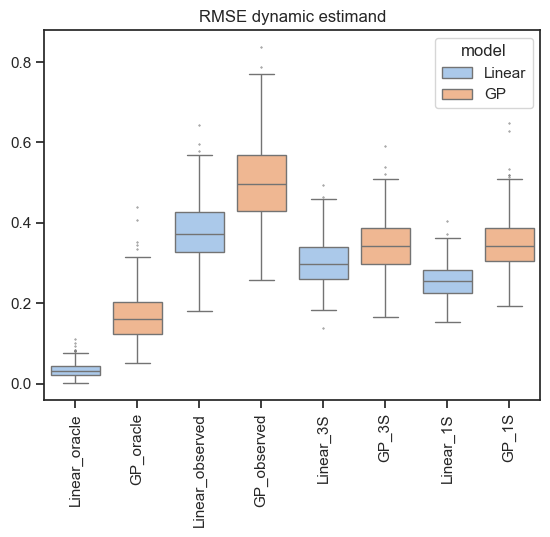

In [12]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

ValueError: cannot reindex on an axis with duplicate labels

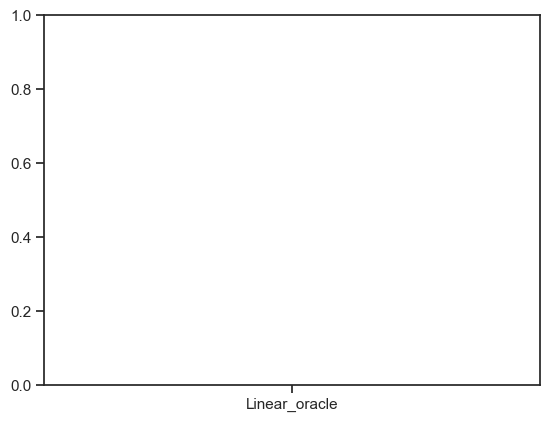

In [45]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE_manual',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE manual dynamic estimand")
# plt.ylim(0,1)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

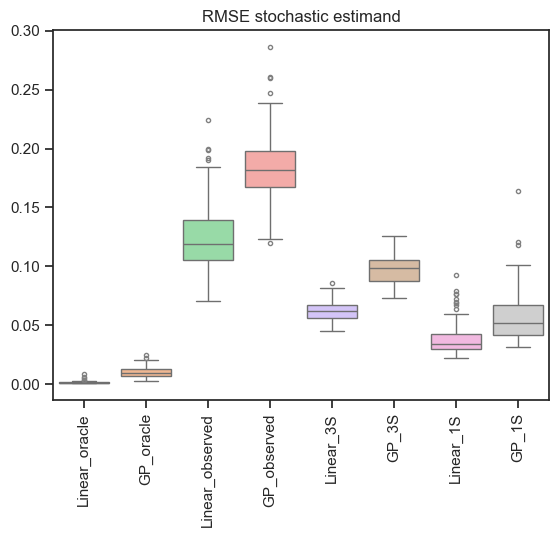

In [21]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'rel_RMSE_all',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
# plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

ValueError: cannot reindex on an axis with duplicate labels

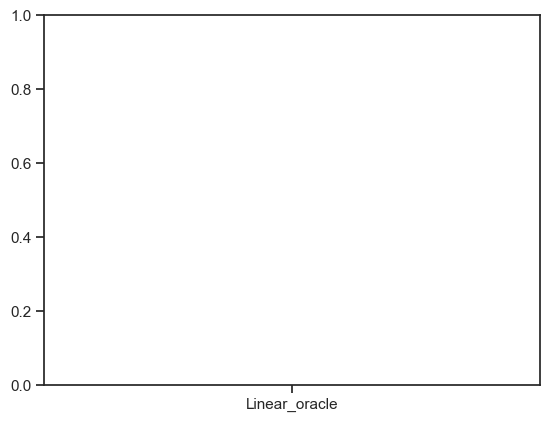

In [44]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAPE_manual',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE stochastic estimand")
plt.ylim(0,1)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

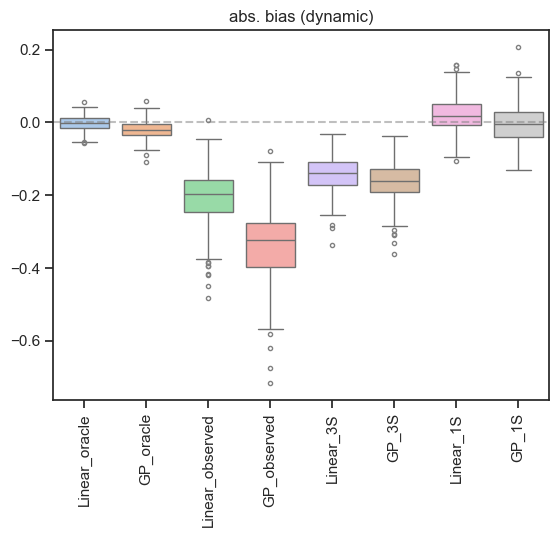

In [48]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
# plt.ylim(0,2)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

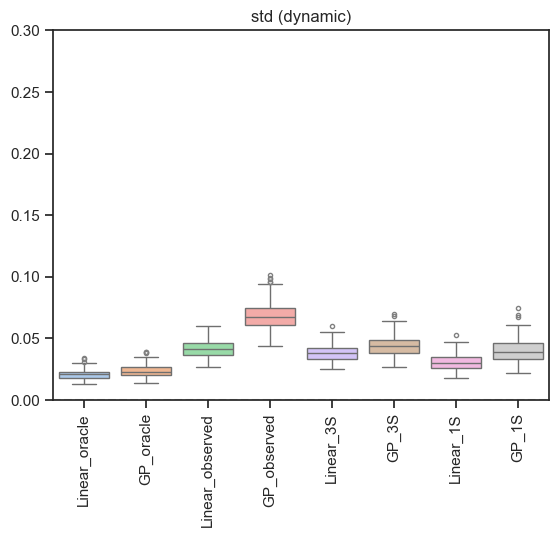

In [49]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
plt.ylim(0,.3)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

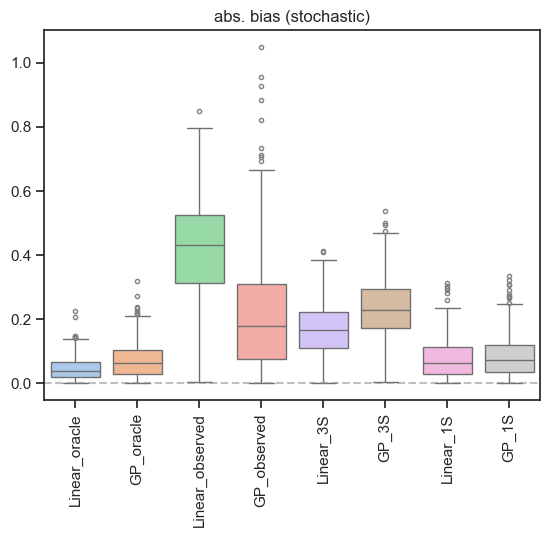

In [43]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

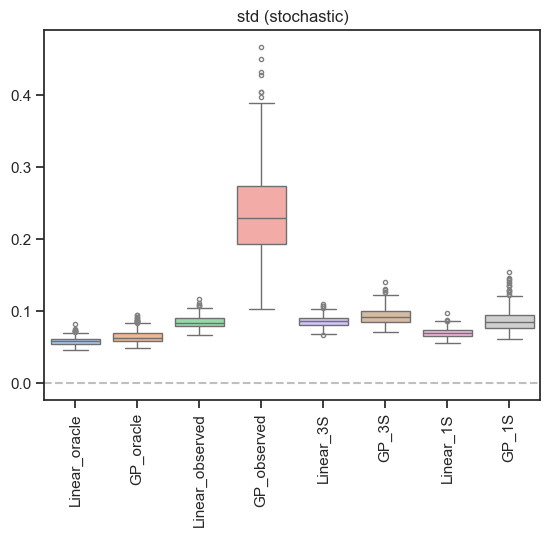

In [44]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [45]:
def format_percentage(value, x=1):
    return f"{value*x:.1f}%"

df_summary_dynamic = df_summary[df_summary["estimand"]=="dynamic"]
# df_summary_dynamic = df_summary[df_summary["estimand"]=="stoch"]
df_summary_dynamic.columns = df_summary_dynamic.columns.droplevel(1)
df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)
print(df_summary_dynamic)

combined_df_dynamic = combined_df[combined_df["estimand"]=="dynamic"]
# combined_df_dynamic = combined_df[combined_df["estimand"]=="stoch"]
# print(combined_df_dynamic)

  estimand   model    type      mean    median       std      bias      TRUE  \
0  dynamic      GP      1S  2.686303  2.686614  0.078935 -0.007258  2.729679   
1  dynamic      GP      3S  2.556009  2.555488  0.090106 -0.137553  2.729679   
2  dynamic      GP    Obs.  1.903802  1.903843  0.158993 -0.789760  2.729679   
3  dynamic      GP  Oracle  2.665387  2.665429  0.066088 -0.028175  2.729679   
4  dynamic  Linear      1S  2.715503  2.715357  0.057726  0.021942  2.729679   
5  dynamic  Linear      3S  2.600056  2.599382  0.075782 -0.093506  2.729679   
6  dynamic  Linear    Obs.  2.274139  2.274045  0.065130 -0.419422  2.729679   
7  dynamic  Linear  Oracle  2.694056  2.693935  0.050027  0.000494  2.729679   

       RMSE  RMSE_all       MAE   MAE_all       MAPE      q025      q975  \
0  0.672238  0.728494  0.481562  0.516519  21.319234  2.530816  2.840398   
1  0.719519  0.859364  0.527715  0.635025  10.586998  2.381072  2.733973   
2  1.568245  1.608144  1.217872  1.242838  49.79368

C:\Users\bar21\AppData\Local\Temp\ipykernel_13124\2229529795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
C:\Users\bar21\AppData\Local\Temp\ipykernel_13124\2229529795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)


In [46]:
df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)

print(df_summary_dynamic)


  estimand   model    type      mean    median       std      bias      TRUE  \
0  dynamic      GP      1S  2.686303  2.686614  0.078935 -0.007258  2.729679   
1  dynamic      GP      3S  2.556009  2.555488  0.090106 -0.137553  2.729679   
2  dynamic      GP    Obs.  1.903802  1.903843  0.158993 -0.789760  2.729679   
3  dynamic      GP  Oracle  2.665387  2.665429  0.066088 -0.028175  2.729679   
4  dynamic  Linear      1S  2.715503  2.715357  0.057726  0.021942  2.729679   
5  dynamic  Linear      3S  2.600056  2.599382  0.075782 -0.093506  2.729679   
6  dynamic  Linear    Obs.  2.274139  2.274045  0.065130 -0.419422  2.729679   
7  dynamic  Linear  Oracle  2.694056  2.693935  0.050027  0.000494  2.729679   

       RMSE  RMSE_all       MAE   MAE_all       MAPE      q025      q975  \
0  0.672238  0.728494  0.481562  0.516519  21.319234  2.530816  2.840398   
1  0.719519  0.859364  0.527715  0.635025  10.586998  2.381072  2.733973   
2  1.568245  1.608144  1.217872  1.242838  49.79368

C:\Users\bar21\AppData\Local\Temp\ipykernel_13124\2384414092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)


In [25]:
df_summary_dynamic["true"]

KeyError: 'true'

C:\Users\bar21\AppData\Local\Temp\ipykernel_23944\2107373927.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)


KeyError: 'true'

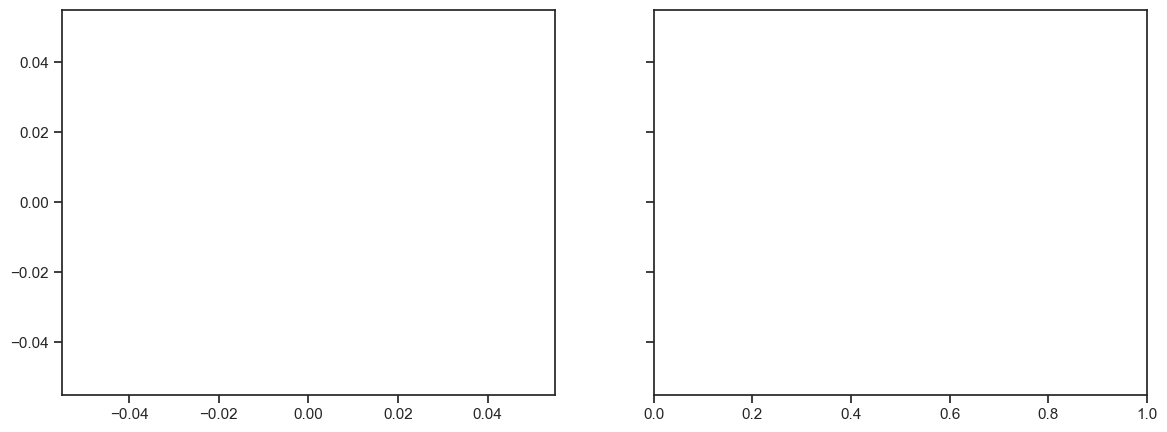

In [26]:
# Plot points with error bars
categories = np.arange(len(df_summary_dynamic['model_type']))
category_labels = df_summary_dynamic['model_type'].unique()

# Create a dictionary to map category positions

# Map categ to positions
model_names = ['True', 'Observed', 'Multi-stage', 'Plug-in']
model_order = ['Linear_Oracle', 'GP_Oracle', 'Linear_Obs.', 'GP_Obs.',
               'Linear_3S', 'GP_3S', 'Linear_1S', 'GP_1S']
categ_pos = {category: pos for pos, category in enumerate(model_order)}
df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)
# combined_df_dynamic['categ_pos'] = combined_df_dynamic['model_type'].map(categ_pos)

# Assign colors to categ2
unique_categ2 = df_summary_dynamic['model']
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_categ2)))
color_map = { "GP" : "tab:orange", "Linear" : "tab:blue"}
# color_map = dict(zip(unique_categ2, colors))

# Plotting
plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('fast')

fig, axs = plt.subplots(1, 2, figsize=(14, 5),
                        gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
# for ax in axs:
#     ax.set_facecolor('white')
# Plot points with different colors based on categ2
for categ2 in unique_categ2:
    subset = df_summary_dynamic[df_summary_dynamic['type'] == categ2]
    axs[0].scatter(subset['mean'],
                subset['categ_pos'],
                label=f'{categ2}', color=color_map[categ2], s=650)


for i, row in df_summary_dynamic.iterrows():
    axs[0].errorbar(
        row['mean'] - row['true'], 
        row['categ_pos'], 
        xerr=[[row['mean'] - row['q025']],
              [row['q975'] - row['mean']]], 
        fmt='o', 
        # color='black', 
        color = color_map[row['model']], 
        ecolor = color_map[row['model']], 
        # ecolor='black', 
        capsize=5, markersize = 8   
    )
    
    axs[0].annotate(
                    # row['mean_ind_cover'], 
                    row['coverage'], 
                    xy=(row['mean'] - row['true'], row['categ_pos']), 
                    xytext=(0, 13), 
                    textcoords='offset points', 
                    ha='center', 
                    va='top',
                    fontsize=10, 
                    color='black')    

# Customize the x-axis to show category labels
axs[0].set_yticks(np.arange(0.5,len(model_order),2))
# axs[0].set_yticklabels(model_order)
axs[0].set_yticklabels(model_names, fontsize=14, fontweight='bold')
axs[0].set_ylim(-1, len(model_order) - 0.5)
# axs[0].axvline(df_summary_dynamic["true"][0], color='grey', linestyle='--', alpha=0.5)
axs[0].axvline(0, color='black', linestyle='--', alpha=0.3)
axs[0].set_title('Coverage & Mean error (95% CI)', fontsize=16, fontweight='bold')
# axs[0].grid(True)


flierprops = dict(marker='.', markerfacecolor='None', markersize=3,  markeredgecolor='grey')
sns.boxplot(
    data=combined_df_dynamic, 
    # x='MAE', 
    x='RMSE', 
    # x='MAPE', 
    y='method', 
    hue="model", 
    palette=color_map, 
    ax=axs[1],
    flierprops=flierprops
)

axs[1].set_yticks(np.arange(0.5,len(model_order),2))
axs[1].set_ylim(-1, len(model_order) - 0.5)
# axs[1].set_yticklabels([])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('RMSE', fontsize=18, fontweight='bold')
handles, labels = axs[1].get_legend_handles_labels()
ordered_handles = [handles[1], handles[0]]  # Reorder legend
ordered_labels = [labels[1], labels[0]]  # Reorder labels
axs[1].legend(ordered_handles, ordered_labels, title='', loc='upper right', 
              fontsize=13)
# axs[1].grid(True)
plt.tight_layout()
# plt.style.use('seaborn-whitegrid')
axs[0].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)


# plt.savefig('results/figs/nonlin_truncated_parab.png', dpi = 1000)           # Save as PNG file
plt.show()
